# Create animations of sea ice concentration data
## Requires ffmpeg, easiest to run from DEA sandbox

In [1]:
import sys
import numpy as np
import odc.geo.xr
import xarray as xr
sys.path.append('/g/data/jk72/sc0554/dea-notebooks/Tools/')
from dea_tools.plotting import xr_animation
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import Video

In [2]:
data = xr.open_dataset('/g/data/jk72/MIZ/processed/asi2_monthly.nc')
data = data.odc.assign_crs("EPSG:3031")
one_year = data.sel(time=slice("2013-02-01", "2014-02-01"))

Exporting animation to animated_timeseries.mp4


  0%|          | 0/12 (0.0 seconds remaining at ? frames/s)

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

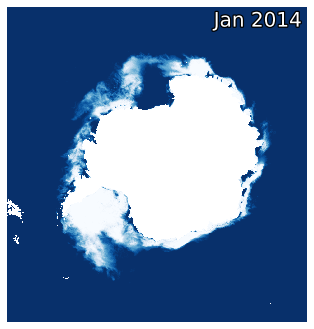

In [6]:
# Produce time series animation 
xr_animation(ds=one_year, 
             bands=['conc'],
             output_path='animated_timeseries.mp4',                                
             interval=250, 
             width_pixels=300,
             # percentile_stretch=(0.01, 0.99),
             show_date="%b %Y",
             show_colorbar=False,
             imshow_kwargs={'cmap': 'Blues_r'})

# Plot animation
plt.close()
Video('animated_timeseries.mp4', embed=True)